In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import random
import math

In [19]:
def readImagePgm(file_name):
    file = open(file_name, "r")
    lines = file.readlines() 
    for line in list(lines):
        if(line[0]=='#'):
            lines.remove(line)
    l = []
    for line in list(lines):
        for word in line.split():
            l.append(word)      
    p = l[0]
    if (p!='P2' and p!='P5'):
        print('Insupported format')
        exit()
    del(l[0]) 
    ly = int(l[0])
    del(l[0])
    lx = int(l[0])
    del(l[0])
    density = int(l[0])
    del(l[0])
    for i in range(0,len(l)):
        l[i] = int(l[i]) 
    l= np.array(l)       
    matrix = np.matrix(l.reshape((lx, ly)))
    file.close()
    print(lx,ly)
    return matrix

In [20]:
def writeImagePgm(m, lx, ly, density, output_file):
    file = open(output_file, "w")
    file.write("P2")
    file.write(f'\n{ly}')
    file.write(f' {lx}')
    file.write(f'\n{density}\n')
    arr = np.matrix(m)
    arr_d = (np.asarray(arr)).flatten()
    for i in range(len(arr_d)):
        file.write(f'{arr_d[i]} ')
    file.close()

In [100]:
matrix = readImagePgm('images/mona.pgm')
matrix

360 250


matrix([[104, 103, 105, ...,  71,  71,  72],
        [109, 103, 105, ...,  69,  70,  71],
        [109, 105,  99, ...,  70,  70,  72],
        ...,
        [ 17,  17,  16, ...,   1,   6,  11],
        [ 14,  14,  14, ...,   0,   2,  10],
        [ 14,  13,  13, ...,   0,   2,  11]])

(-0.5, 249.5, 359.5, -0.5)

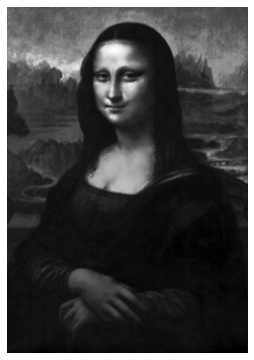

In [22]:
plt.figure(figsize=(14,14)) 
plt.subplot(2,1,1)
plt.imshow(matrix, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

In [23]:
def mean_stdev(matrix):
    matrix = np.matrix(matrix)
    mean = matrix.mean()
    stdev = np.std(matrix)
    return mean, stdev

In [24]:
mean_stdev(matrix)

(47.64337777777778, 45.90780275643729)

# Contrast

## Histogram Equalization

In [25]:
def histogram (matrix):
    matrix = np.matrix(matrix)
    lx,ly = matrix.shape
    histogram = np.zeros(256).astype(int)
    for i in range (256):
        pixels_value_i = np.sum (matrix == i )
        histogram[i] = pixels_value_i
    return histogram

In [26]:
def show_histogram(histogram):
    plt.bar(range(256), histogram)
    plt.xlabel('Graylevel / intensity')
    plt.ylabel('Frequency')

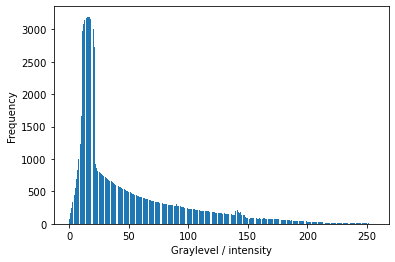

In [27]:
hist = histogram(matrix)
show_histogram(hist)

In [28]:
def cumulative_histogram (histogram):
    histC = np.zeros(256).astype(int)
    histC[0] = histogram[0]
    for i in range(1,  256):
        histC[i] = histogram[i] + histC[i-1]
    return(histC)

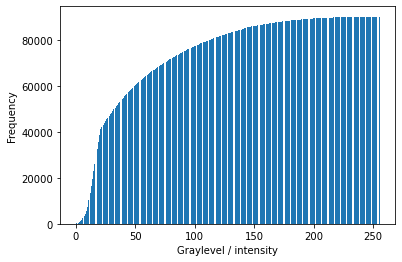

In [29]:
histC = cumulative_histogram (hist)
show_histogram(histC)

In [30]:
def histogram_equalization(matrix):
    hist = histogram(matrix)
    histC = cumulative_histogram (hist)
    hist_transform = np.zeros(256).astype(np.uint8)
    N, M = matrix.shape
    # create the image to store the equalised version
    matrix_eq = np.zeros([N,M]).astype(np.uint8)
    for z in range(256):
        s = ((255)/float(M*N))*histC[z]
        matrix_eq[ np.where(matrix == z) ] = s
        hist_transform[z] = s
    return (matrix_eq, hist_transform)

In [31]:
img_eq, img_transf = histogram_equalization(matrix)
hist_img = histogram(matrix)
histeq_img = histogram(img_eq)

Text(0, 0.5, 'Frequency')

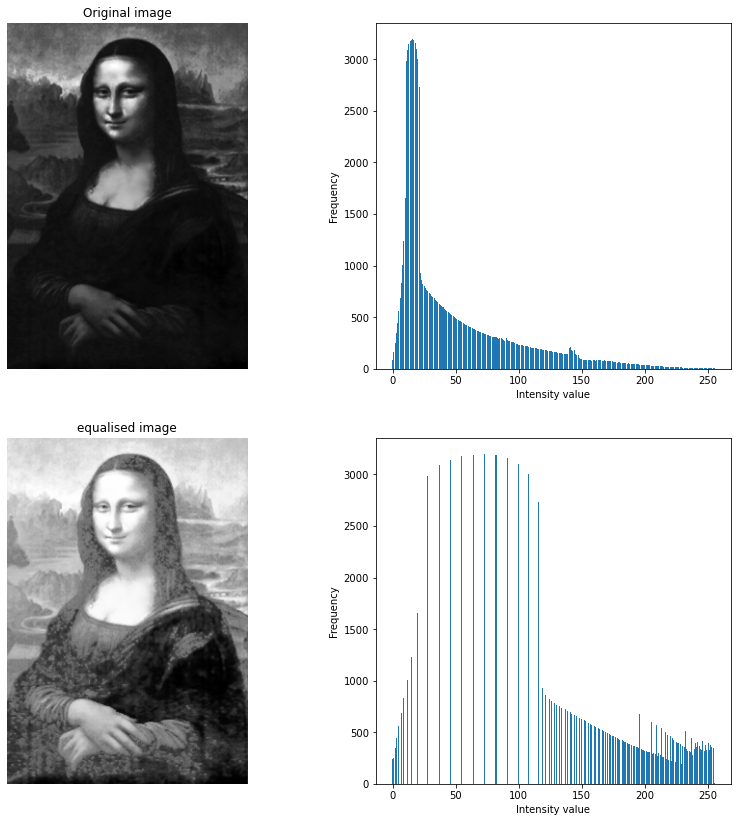

In [32]:
plt.figure(figsize=(14,14)) 
plt.subplot(2,2,1)
plt.imshow(matrix, cmap="gray")
plt.title('Original image')
plt.axis('off')
plt.subplot(2,2,2)
plt.bar(range(256), hist_img)
plt.xlabel('Intensity value')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.imshow(img_eq, cmap="gray")
plt.title('equalised image')
plt.axis('off')
plt.subplot(2,2,4)
plt.bar(range(256), histeq_img)
plt.xlabel('Intensity value')
plt.ylabel('Frequency')

## Linear Transformation

In [33]:
def linear_transformation(matrix):
    matrix = np.matrix(matrix)
    max = matrix.max()
    min = matrix.min()
    matrix_transformed = (255/(max-min))*(matrix-min)
    return matrix_transformed

In [34]:
linear_transformed = linear_transformation(matrix)
writeImagePgm(linear_transformed, 640, 480, 255, 'images/linear_transformed_contrast_pic1.pgm')

(-0.5, 249.5, 359.5, -0.5)

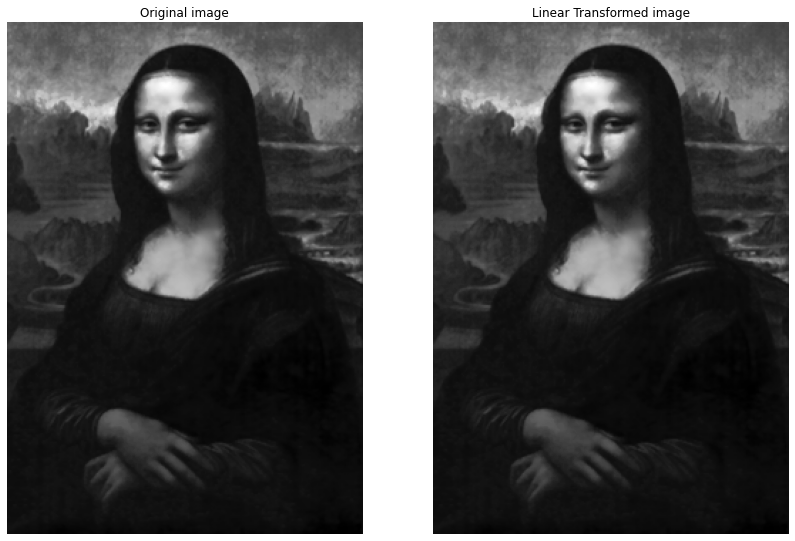

In [35]:
plt.figure(figsize=(14,14)) 
plt.subplot(1,2,1)
plt.imshow(matrix, cmap="gray", vmin=0, vmax=255)
plt.title('Original image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(linear_transformed, cmap="gray", vmin=0, vmax=255)
plt.title('Linear Transformed image')
plt.axis('off')

## Satured Transformation

In [36]:
def saturated_transformation(matrix, min, max):
    matrix = np.matrix(matrix)
    matrix_transformed = (255/(max-min))*(matrix-min)
    return matrix_transformed

In [37]:
saturated_transformed = saturated_transformation(matrix,150,220)
writeImagePgm(saturated_transformed, 640, 480, 255, 'images/satured_transformed_contrast_pic1.pgm')

(-0.5, 249.5, 359.5, -0.5)

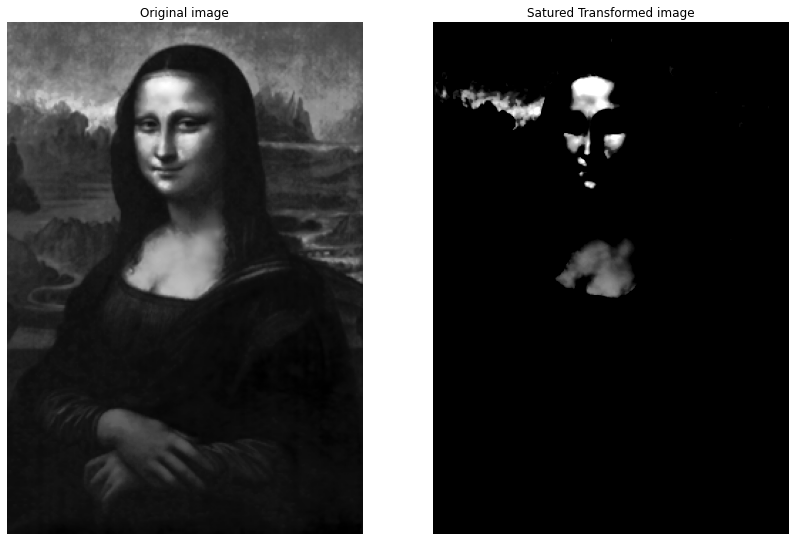

In [38]:
plt.figure(figsize=(14,14)) 
plt.subplot(1,2,1)
plt.imshow(matrix, cmap="gray", vmin=0, vmax=255)
plt.title('Original image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(saturated_transformed, cmap="gray", vmin=0, vmax=255)
plt.title('Satured Transformed image')
plt.axis('off')

# Filters

In [43]:
def noise(matrix):
    matrix = np.matrix(matrix)
    lx,ly = np.shape(matrix)
    arr = (np.asarray(matrix)).flatten()
    for i in range(len(arr)):
        r = random.randint(0,20)
        if(r==0):
            arr[i] = 0
        elif(r==20):
            arr[i]=255
    matrix = np.matrix(arr.reshape((lx, ly)))
    return matrix

In [44]:
image_with_noise = noise(matrix)
writeImagePgm(image_with_noise, 640, 480, 255, 'images/pic1_with_noise.pgm')

(-0.5, 249.5, 359.5, -0.5)

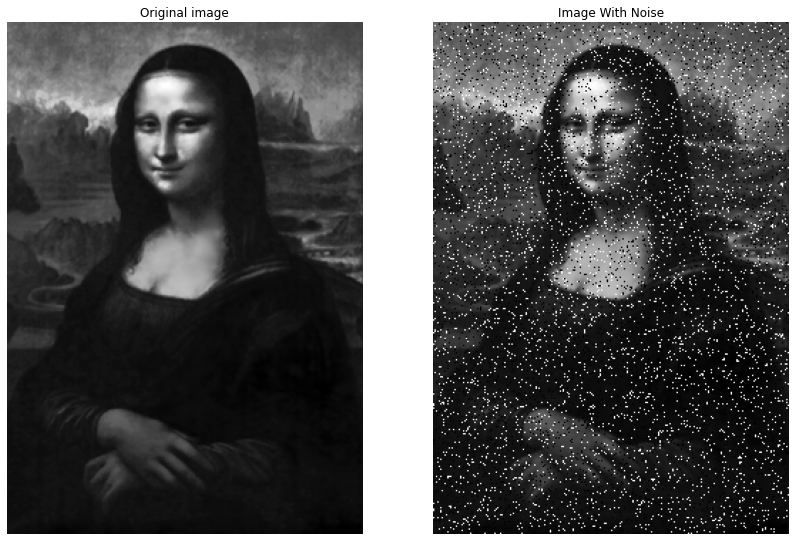

In [45]:
plt.figure(figsize=(14,14)) 
plt.subplot(1,2,1)
plt.imshow(matrix, cmap="gray", vmin=0, vmax=255)
plt.title('Original image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image_with_noise, cmap="gray", vmin=0, vmax=255)
plt.title('Image With Noise')
plt.axis('off')

In [46]:
def pad(matrix):
    matrix = np.matrix(matrix)
    matrix_padded = np.pad(matrix, pad_width=1, mode='constant', constant_values=0)
    return matrix_padded

In [47]:
def filer_moy(matrix):
    padded_matrix = pad(matrix)
    lx,ly = np.shape(padded_matrix)
    new_padded_matrix = np.zeros((lx,ly)).astype(int)
    for x in range(1,lx-1):
        for y in range(1,ly-1):
            new_padded_matrix[x,y] = ( padded_matrix[x-1,y-1] + padded_matrix[x,y-1] + padded_matrix[x+1,y-1] + padded_matrix[x-1,y] + padded_matrix[x,y] + padded_matrix[x+1,y] + padded_matrix[x-1,y+1] + padded_matrix[x,y+1] + padded_matrix[x+1,y+1] )/9          
    new_unpadded_matrix = np.delete(new_padded_matrix, lx-1, 0)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, ly-1, 1)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, 0, 0)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, 0, 1)
    return new_unpadded_matrix

In [48]:
noise_filter_moy = filer_moy(image_with_noise)
writeImagePgm(noise_filter_moy, 640, 480, 255, 'images/moy_filtered_pic1_with_noise.pgm')

(-0.5, 249.5, 359.5, -0.5)

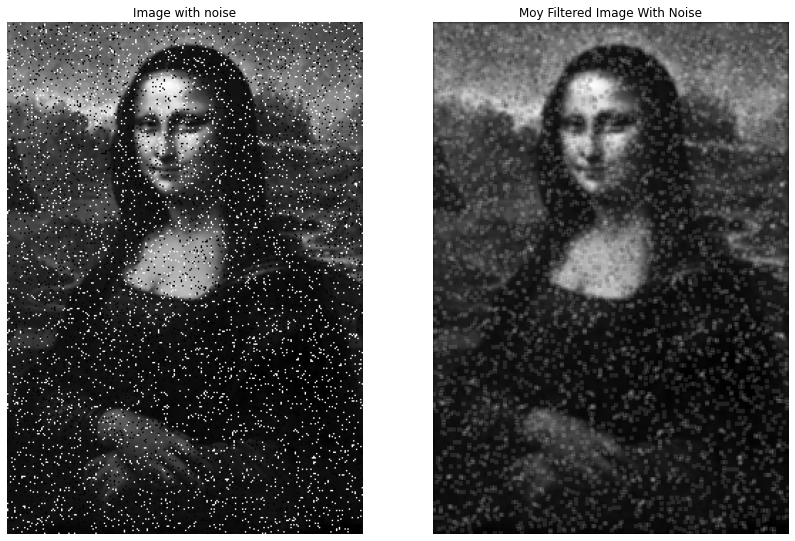

In [49]:
plt.figure(figsize=(14,14)) 
plt.subplot(1,2,1)
plt.imshow(image_with_noise, cmap="gray", vmin=0, vmax=255)
plt.title('Image with noise')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(noise_filter_moy, cmap="gray", vmin=0, vmax=255)
plt.title('Moy Filtered Image With Noise')
plt.axis('off')

In [50]:
def filer_median(matrix):
    padded_matrix = pad(matrix)
    lx,ly = np.shape(padded_matrix)
    new_padded_matrix = np.zeros((lx,ly)).astype(int)
    for x in range(1,lx-1):
        for y in range(1,ly-1):
            arr = [padded_matrix[x-1,y-1],
                   padded_matrix[x,y-1],
                   padded_matrix[x+1,y-1],
                   padded_matrix[x-1,y],
                   padded_matrix[x,y],
                   padded_matrix[x+1,y],
                   padded_matrix[x-1,y+1],
                   padded_matrix[x,y+1],
                   padded_matrix[x+1,y+1]]
            arr = np.sort(arr)
            new_padded_matrix[x,y] = arr[4]            
    new_unpadded_matrix = np.delete(new_padded_matrix, lx-1, 0)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, ly-1, 1)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, 0, 0)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, 0, 1)
    return new_unpadded_matrix

In [51]:
noise_filter_median = filer_median(image_with_noise)
writeImagePgm(noise_filter_median, 640, 480, 255, 'images/median_filtered_pic1_with_noise.pgm')

(-0.5, 249.5, 359.5, -0.5)

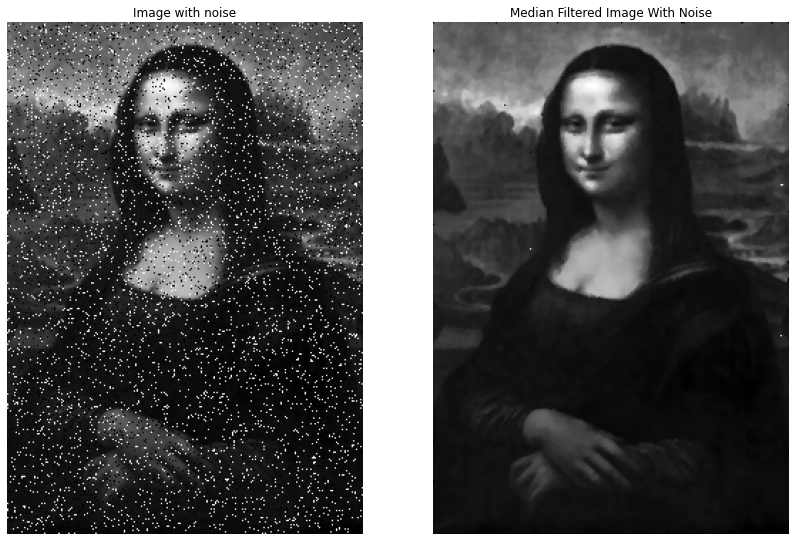

In [52]:
plt.figure(figsize=(14,14)) 
plt.subplot(1,2,1)
plt.imshow(image_with_noise, cmap="gray", vmin=0, vmax=255)
plt.title('Image with noise')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(noise_filter_median, cmap="gray", vmin=0, vmax=255)
plt.title('Median Filtered Image With Noise')
plt.axis('off')

In [53]:
image_without_noise_filtered_moy = filer_moy(matrix) 
writeImagePgm(image_without_noise_filtered_moy, 640, 480, 255, 'images/moy_filtered_pic1_without_noise.pgm')

(-0.5, 249.5, 359.5, -0.5)

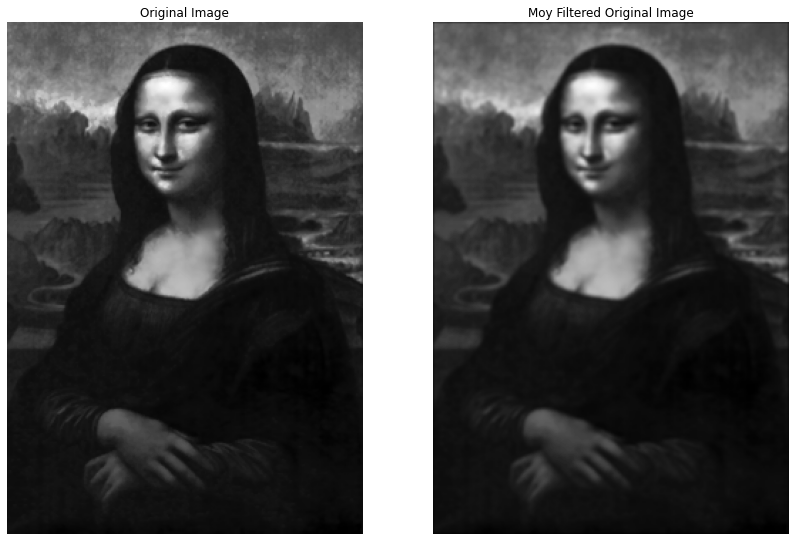

In [54]:
plt.figure(figsize=(14,14)) 
plt.subplot(1,2,1)
plt.imshow(matrix, cmap="gray", vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image_without_noise_filtered_moy, cmap="gray", vmin=0, vmax=255)
plt.title('Moy Filtered Original Image')
plt.axis('off')

In [55]:
image_without_noise_filtered_median = filer_median(matrix) 
writeImagePgm(image_without_noise_filtered_median, 640, 480, 255, 'images/median_filtered_pic1_without_noise.pgm')

(-0.5, 249.5, 359.5, -0.5)

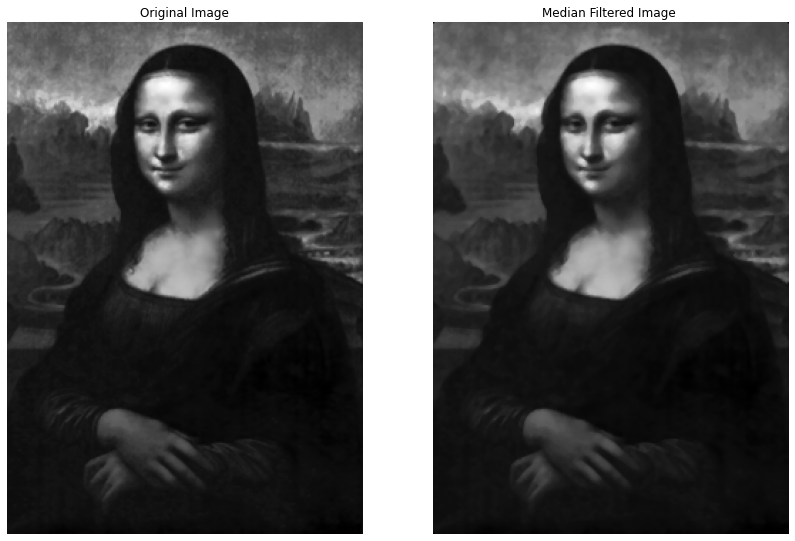

In [56]:
plt.figure(figsize=(14,14)) 
plt.subplot(1,2,1)
plt.imshow(matrix, cmap="gray", vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image_without_noise_filtered_median, cmap="gray", vmin=0, vmax=255)
plt.title('Median Filtered Image ')
plt.axis('off')

## SNR (Signal to Noise Ratio)

In [57]:
def signal_to_Noise_Ratio(matrix, filtered_matrix):
    matrix = np.matrix(matrix)
    filtered_matrix = np.matrix(filtered_matrix)
    mean = matrix.mean()
    S = 0
    u = matrix-mean
    B = 0
    v = filtered_matrix - matrix
    lx,ly = np.shape(matrix)
    for x in range(lx):
        for y in range(ly):
            S = S + (u[x,y]*u[x,y])
            B = B + (v[x,y]*v[x,y])
            
    return math.sqrt(S/B)

In [58]:
print(signal_to_Noise_Ratio(matrix,noise_filter_moy))
print(signal_to_Noise_Ratio(matrix,noise_filter_median))

2.4922083385786307
12.74646973119297


# Segmentation

In [59]:
def thresholding(f, L):
    # create a new image with zeros
    f_tr = np.zeros(f.shape).astype(int)
    # setting to 255 the pixels below the threshold
    f_tr[np.where(f > L)] = 255
    return f_tr 

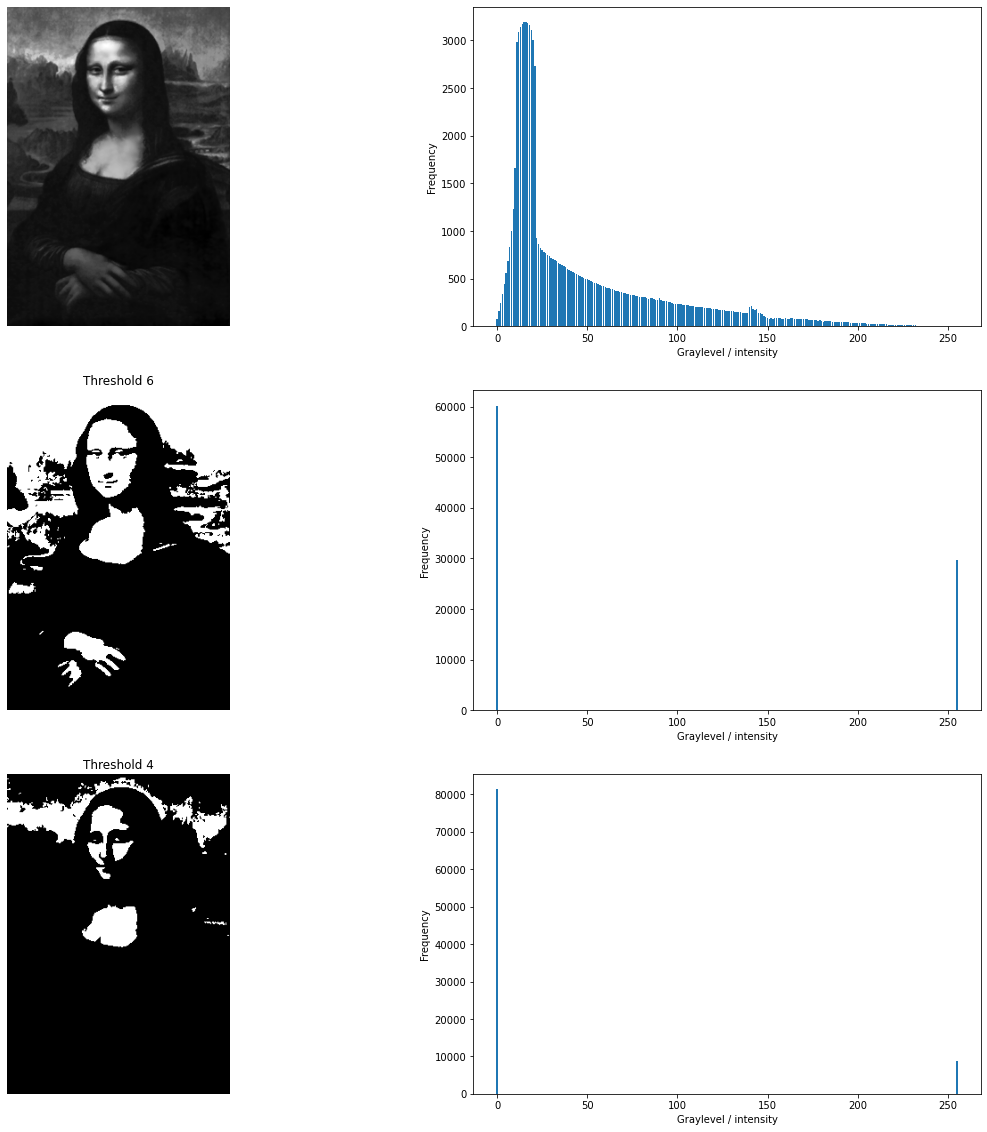

In [60]:
f_thres6 = thresholding(matrix, 50)
hist_t6 = histogram(f_thres6)

f_thres4 = thresholding(matrix, 120)
hist_t4 = histogram(f_thres4)
plt.figure(figsize=(20,20))
plt.subplot(321); plt.imshow(matrix,cmap="gray"); plt.axis('off')
plt.subplot(322); show_histogram(hist)
plt.subplot(323); plt.imshow(f_thres6,cmap="gray"); plt.axis('off'); plt.title('Threshold 6')
plt.subplot(324); show_histogram(hist_t6)
plt.subplot(325); plt.imshow(f_thres4,cmap="gray"); plt.axis('off'); plt.title('Threshold 4')
plt.subplot(326); show_histogram(hist_t4)

## Otsu Thresholding

In [98]:
def otsu(matrix):
    lx,ly = np.shape(matrix)
    matrix = np.matrix(matrix)
    histogramme = histogram(matrix)

    max = -math.inf
    minSeuil = -1
    
    for seuil in range(1,len(histogramme)-1):
        w1 = (np.sum(histogramme[:seuil]))
        w2 = (np.sum(histogramme[seuil:]))
        variance1 = np.var(histogramme[:seuil])
        variance2 = np.var(histogramme[seuil:])
        variance = w1 * variance1 + w2 * variance2
        
        if(variance>max):
            max = variance
            maxSeuil = seuil
            
    return(thresholding(matrix, maxSeuil), maxSeuil)

In [81]:
image_otsu, maxSeuil = otsu(matrix)

<BarContainer object of 256 artists>

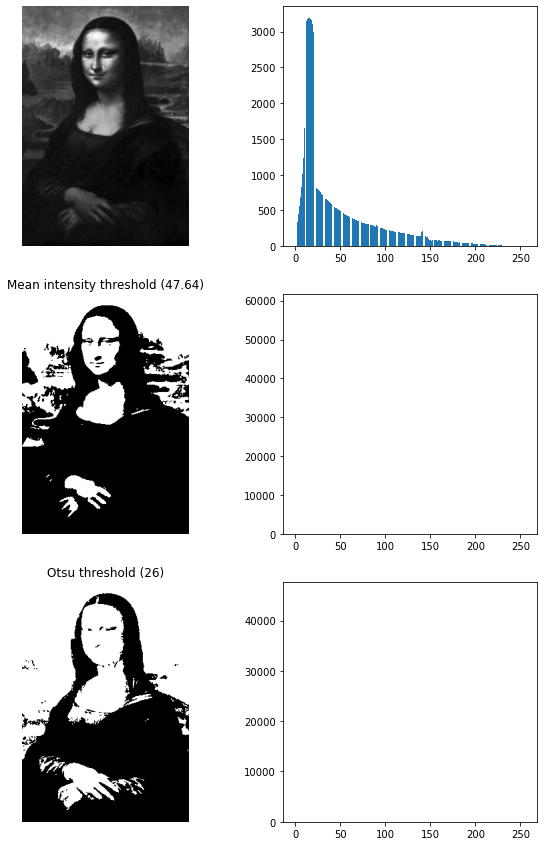

In [82]:
img_t = thresholding(matrix,np.mean(matrix))
hist_t = histogram(img_t)
hist_o = histogram(image_otsu)

plt.figure(figsize=(10,15))
plt.subplot(321); plt.imshow(matrix,cmap="gray"); plt.axis('off')
plt.subplot(322); plt.bar(np.arange(0,256), hist)
plt.subplot(323); plt.imshow(img_t, cmap="gray"); plt.axis('off'); plt.title('Mean intensity threshold (%.2f)' % (np.mean(matrix)))
plt.subplot(324); plt.bar(np.arange(0,256), hist_t)
plt.subplot(325); plt.imshow(image_otsu, cmap="gray"); plt.axis('off'); plt.title('Otsu threshold (%d)' % (maxSeuil))
plt.subplot(326); plt.bar(np.arange(0,256), hist_o)

In [83]:
def pad(matrix):
    matrix = np.matrix(matrix)
    matrix_padded = np.pad(matrix, pad_width=1, mode='constant', constant_values=0)
    return matrix_padded

In [84]:
def dilatation(matrix):
    padded_matrix = pad(matrix)
    lx,ly = np.shape(padded_matrix)
    new_padded_matrix = np.zeros((lx,ly)).astype(int)
    for x in range(1,lx-1):
        for y in range(1,ly-1):
            arr = np.array([padded_matrix[x-1,y-1],
                   padded_matrix[x,y-1],
                   padded_matrix[x+1,y-1],
                   padded_matrix[x-1,y],
                   padded_matrix[x,y],
                   padded_matrix[x+1,y],
                   padded_matrix[x-1,y+1],
                   padded_matrix[x,y+1],
                   padded_matrix[x+1,y+1]])
            min = arr.min()
            new_padded_matrix[x,y] = min          
    new_unpadded_matrix = np.delete(new_padded_matrix, lx-1, 0)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, ly-1, 1)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, 0, 0)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, 0, 1)
    return new_unpadded_matrix

In [85]:
def errosion(matrix):
    padded_matrix = pad(matrix)
    lx,ly = np.shape(padded_matrix)
    new_padded_matrix = np.zeros((lx,ly)).astype(int)
    for x in range(1,lx-1):
        for y in range(1,ly-1):
            arr = np.array([padded_matrix[x-1,y-1],
                   padded_matrix[x,y-1],
                   padded_matrix[x+1,y-1],
                   padded_matrix[x-1,y],
                   padded_matrix[x,y],
                   padded_matrix[x+1,y],
                   padded_matrix[x-1,y+1],
                   padded_matrix[x,y+1],
                   padded_matrix[x+1,y+1]])
            min = arr.max()
            new_padded_matrix[x,y] = min          
    new_unpadded_matrix = np.delete(new_padded_matrix, lx-1, 0)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, ly-1, 1)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, 0, 0)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, 0, 1)
    return new_unpadded_matrix

In [86]:
image_err = errosion(image_otsu)

In [87]:
image_dil = dilatation(image_otsu)

<BarContainer object of 256 artists>

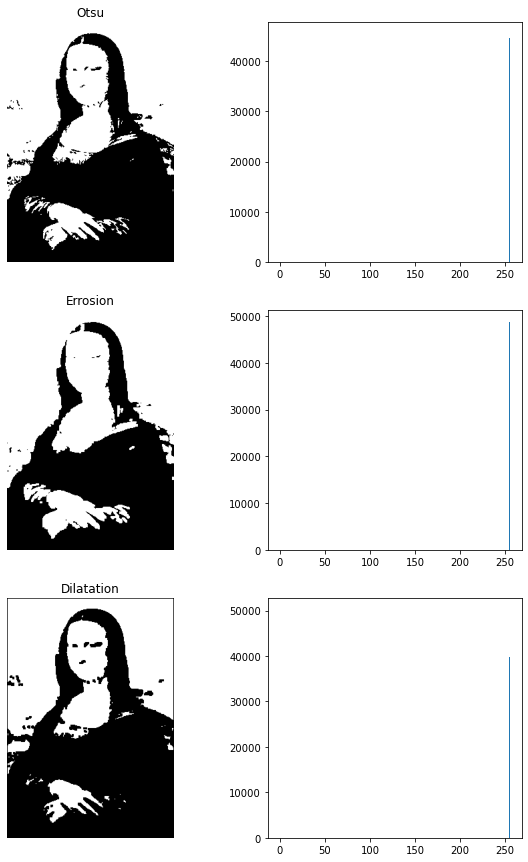

In [88]:
hist = histogram(image_otsu)
hist_err = histogram(image_err)
hist_dil = histogram(image_dil)

plt.figure(figsize=(10,15))
plt.subplot(321); plt.imshow(image_otsu,cmap="gray"); plt.axis('off'); plt.title('Otsu' )
plt.subplot(322); plt.bar(np.arange(0,256), hist)
plt.subplot(323); plt.imshow(image_err, cmap="gray"); plt.axis('off'); plt.title('Errosion' )
plt.subplot(324); plt.bar(np.arange(0,256), hist_err)
plt.subplot(325); plt.imshow(image_dil, cmap="gray"); plt.axis('off'); plt.title('Dilatation' )
plt.subplot(326); plt.bar(np.arange(0,256), hist_dil)

In [92]:
def opening(matrix):
    return errosion(dilatation(matrix))

In [95]:
def closing(matrix):
    return dilatation(errosion(matrix))

In [96]:
img_op = opening(image_otsu)
img_cls = closing(image_otsu)

<BarContainer object of 256 artists>

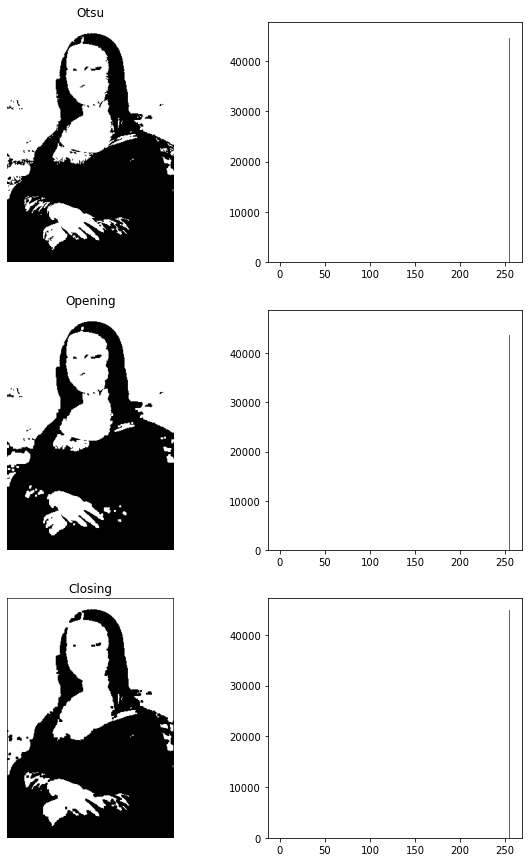

In [97]:
hist_op = histogram(img_op)
hist_cls = histogram(img_cls)

plt.figure(figsize=(10,15))
plt.subplot(321); plt.imshow(image_otsu,cmap="gray"); plt.axis('off'); plt.title('Otsu' )
plt.subplot(322); plt.bar(np.arange(0,256), hist)
plt.subplot(323); plt.imshow(img_op, cmap="gray"); plt.axis('off'); plt.title('Opening' )
plt.subplot(324); plt.bar(np.arange(0,256), hist_op)
plt.subplot(325); plt.imshow(img_cls, cmap="gray"); plt.axis('off'); plt.title('Closing' )
plt.subplot(326); plt.bar(np.arange(0,256), hist_cls)